<a href="https://colab.research.google.com/github/SylGrafe/lab1Repo/blob/master/colab_CNN00.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

colab_CNN00 , 
CNN test the influence of the nb of layers  , more explanations at:
https://github.com/SylGrafe/lab1Repo/blob/master/lab1Sygr0003.pdf


fatal: destination path 'lab1Lib' already exists and is not an empty directory.
3Conv  for fashion NMIST classification
10000/10000 [==============================] - 1s 92us/step

******** testRes:[0.27410674699544907, 0.902]***********
 
saving on colab_CNN00.json  the model config and  results 
(colab_CNN00 3Conv at:2703_1556 
testRes:[0.2741, 0.902]
compInfo: adam, categorical_crossentropy
info:CNN filters: 32, 64, 64 

{'val_loss': [0.3936, 0.3149, 0.2929, 0.2725, 0.2732, 0.2801, 0.2654, 0.2661], 'val_acc': [0.8547, 0.8862, 0.8955, 0.902, 0.902, 0.897, 0.9075, 0.9058], 'loss': [0.559, 0.3502, 0.3015, 0.2715, 0.2458, 0.2276, 0.2095, 0.1935], 'acc': [0.7955, 0.8728, 0.8897, 0.9007, 0.9088, 0.916, 0.9228, 0.9283]}
{'batch_size': 64, 'epochs': 8, 'steps': None, 'samples': 54000, 'verbose': 0, 'do_validation': True, 'metrics': ['loss', 'acc', 'val_loss', 'val_acc']}) 


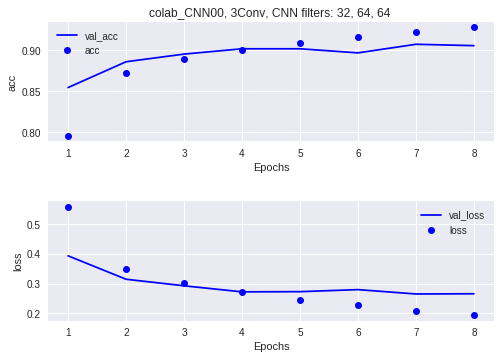

************ dumpOnFile () : append to file  colab_CNN00.json  

 Dumping object 3Conv in the file  colab_CNN00.json 
 _2703_155728 duration: h:0 mn:1 sec:5 


In [41]:
import keras
import numpy as np
keras.__version__
import sys
import datetime
from keras.datasets import fashion_mnist
from keras.utils import to_categorical
from keras import layers
from keras import models

# lab1Utils.py is expected to be in the 
# https://github.com/SylGrafe/lab1Lib.git
!git clone https://github.com/SylGrafe/lab1Lib.git
import sys
sys.path.insert(0, "lab1Lib")
import lab1Utils


CAndR = lab1Utils.ConfigAndResults
infoStr='test nb of layers in CNN '
optimizerStr = 'adam'
lossStr = 'categorical_crossentropy'
compInfoStr= optimizerStr + ", " + lossStr
theDumpFileName = "colab_CNN00.json"
codeRef="colab_CNN00"
startTime= datetime.datetime.now()
# modify myEpochs to avoid overfitting 
myEpochs=8
myBs=64

L1FilterNb = 64
L2FilterNb = 128
L3FilterNb = 128

L1FilterNb = 32
L2FilterNb = 64
L3FilterNb = 64
unitsNb = 64


# modelStruct 1Conv, 2Conv , 3Conv
modelStruct="3Conv"


theModel = models.Sequential()
if (modelStruct == "3Conv" or modelStruct=="2Conv" or modelStruct=="1Conv"):
  
  theModel.add(layers.Conv2D(L1filterNb, (3, 3), activation='relu',
                             input_shape=(28, 28, 1)))
  infoStr="CNN filter: %d" % (L1FilterNb)
else:
  print ("**** fatal invalid modelStruct ***********")
  sys.exit(1)

  
if (modelStruct == "3Conv" or modelStruct=="2Conv"):
  infoStr="CNN filters: %d,  %d " % (L1FilterNb , L2FilterNb)
  theModel.add(layers.MaxPooling2D((2, 2)))
  theModel.add(layers.Conv2D(L2FilterNb, (3, 3), activation='relu'))

if (modelStruct == "3Conv"):
  infoStr="CNN filters: %d, %d, %d " % (L1FilterNb , L2FilterNb , L3FilterNb)
  theModel.add(layers.MaxPooling2D((2, 2)))
  theModel.add(layers.Conv2D(L3FilterNb, (3, 3), activation='relu'))


theModel.add(layers.Flatten())
theModel.add(layers.Dense(unitsNb, activation='relu'))
theModel.add(layers.Dense(10, activation='softmax'))



(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)


# shuffle the training dataset (5 times!)
for _ in range(5): 
    indexes = np.random.permutation(len(train_images))

train_images = train_images[indexes]
train_labels = train_labels[indexes]

# now set-aside 10% of the train_images/labels as the
# cross-validation sets
val_perc = 0.10
val_count = int(val_perc * len(train_images))

# first pick validation set from train_images/labels
val_data = train_images[:val_count,:]
val_labels = train_labels[:val_count,:]

# leave rest in training set
train_images2 = train_images[val_count:,:]
train_labels2 = train_labels[val_count:,:]


theModel.compile(optimizer=optimizerStr,
              loss=lossStr,
              metrics=['accuracy'])


print ("%s  for fashion NMIST classification" % (modelStruct  ) )

theFit= theModel.fit (train_images2, train_labels2, 
    epochs=myEpochs , verbose=0, batch_size=myBs,
    validation_data=(val_data, val_labels))


              
testRes = theModel.evaluate(test_images, test_labels)
print ("\n******** testRes:%s***********\n " % (  testRes))





# save the results on disk
print ("saving on %s  the model config and  results " % (theDumpFileName))

res= CAndR (modelStruct ,compInfoStr , theFit.history ,  theFit.params , 
 startTime.strftime("%d%m_%H%M")  , testRes= testRes ,
            codeRef=codeRef , info=infoStr)



print(res.toString())
lab1Utils.plotHist (res )



lab1Utils.dumpOnFile (res , theDumpFileName)




stopTime = datetime.datetime.now()
duration = stopTime - startTime
seconds = duration.total_seconds()
hours = seconds // 3600
minutes = (seconds % 3600) // 60
seconds = seconds % 60
theName =  stopTime.strftime("_%d%m_%H%M%S") 
print ( " %s duration: h:%d mn:%d sec:%d " % 
(   theName , hours , minutes , seconds))



In [0]:
from google.colab import files
files.download(theDumpFileName)




In [40]:
!ls colab_CNN00.json


colab_CNN00.json


end notebook
